In [95]:
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2019-11-28 08:38:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.05s   

2019-11-28 08:38:27 (103 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = 'OOV'
training_portion = .8

In [0]:
data = pd.read_csv("/tmp/bbc-text.csv")

In [98]:
data.head(2)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...


In [0]:
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split (data['text'],data['category'],test_size = 1- training_portion, random_state = 0)

In [100]:
print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))


1780.0
1780
1780
445
445


Converting the inputs to numpy array for Tokenizer

In [101]:
print (train_sentences)

841     dominici backs lacklustre france wing christop...
1748    id theft surge hits us consumers almost a quar...
2118    blair  pressing us on climate  tony blair is p...
1174    what really divides the parties so what is the...
1502    iran budget seeks state sell-offs iran s presi...
                              ...                        
1033    labour s  eu propaganda  a  taxpayer subsidise...
1731    crossrail link  to get go-ahead  the £10bn cro...
763     shares rise on new man utd offer shares in man...
835     rock star sued by ex-girlfriend motley crue gu...
1653    file-swappers ready new network legal attacks ...
Name: text, Length: 1780, dtype: object


In [102]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating= trunc_type )

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))


321
120
261
120
528
120


In [103]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating= trunc_type )

print(len(validation_sequences))
print(validation_padded.shape)


445
(445, 120)


In [104]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(data['category'])

word_index_label = label_tokenizer.word_index

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

print(word_index_label)


[1]
[2]
[3]
(1780, 1)
[3]
[1]
[1]
(445, 1)
{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}


In [105]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length= max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24 , 'relu'),
                             tf.keras.layers.Dense(6, 'softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [106]:
num_epochs = 30
history = model.fit(train_padded,training_label_seq, epochs=num_epochs, validation_data=(validation_padded,validation_label_seq))

Train on 1780 samples, validate on 445 samples
Epoch 1/30
1780/1780 [==============================] - 0s 207us/sample - loss: 1.7665 - acc: 0.2000 - val_loss: 1.7343 - val_acc: 0.2022
Epoch 2/30
1780/1780 [==============================] - 0s 132us/sample - loss: 1.6938 - acc: 0.3506 - val_loss: 1.6552 - val_acc: 0.3213
Epoch 3/30
1780/1780 [==============================] - 0s 138us/sample - loss: 1.6043 - acc: 0.4315 - val_loss: 1.5553 - val_acc: 0.6202
Epoch 4/30
1780/1780 [==============================] - 0s 144us/sample - loss: 1.4875 - acc: 0.6433 - val_loss: 1.4232 - val_acc: 0.6337
Epoch 5/30
1780/1780 [==============================] - 0s 139us/sample - loss: 1.3372 - acc: 0.6556 - val_loss: 1.2516 - val_acc: 0.7506
Epoch 6/30
1780/1780 [==============================] - 0s 149us/sample - loss: 1.1503 - acc: 0.7826 - val_loss: 1.0639 - val_acc: 0.8022
Epoch 7/30
1780/1780 [==============================] - 0s 148us/sample - loss: 0.9623 - acc: 0.8421 - val_loss: 0.8774 - val

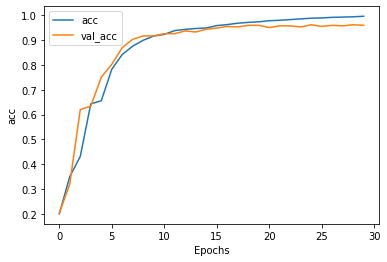

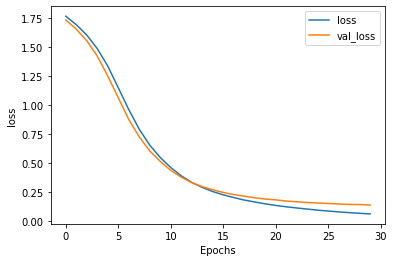

In [107]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [109]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 16)


To create word vector & meta data for Embedding projector

In [0]:
import io

out_v = io.open('vecs_bbc.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_bbc.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs_bbc.tsv')
  files.download('meta_bbc.tsv')

In [125]:
check = ['Brokers cannot misuse client securities, says Tyagi']

check_sequences = tokenizer.texts_to_sequences(check)
check_padded = pad_sequences(check_sequences, maxlen=max_length, padding=padding_type, truncating= trunc_type )

print(len(check_sequences))
print(check_padded.shape)

1
(1, 120)


In [0]:
y_red = model.predict(check_padded)

In [129]:
prediction = y_red > 0.5

print(prediction)

[[False False False  True False False]]
